# Making Predictions and Recommendations with Movie Lens: 
# A CSC 478 Project

## Sarah Cummings, Aniki Ghosh, Mitali Ignole

### Data Preprocessing:

In [2]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import operator

In [7]:
#cd C:\Users\scummings\Desktop\MyFiles\school\movielens\Movielens-02\
#cd '//Users//sarahcummings//Documents//csc478//Movielens02//'
#cd

In [8]:
#Set the column names for the data sets 
#used the readme file to pull columns

userCols=['user_id', 'age', 'sex', 'occupation', 'zip_code']
movieCols=['movie_id', 'title', 'release_date', 'video_release_date',"IMDb_URL","unknown","Action","Adventure","Animation", 
              "Childrens","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery",
               "Romance","Sci-Fi","Thriller","War","Western"]
ratingCols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

#Read in the data sets

users = pd.read_csv(r"//Users//sarahcummings//Documents//csc478//Movielens02//u.user", sep='|', names=userCols, encoding='latin-1')
movies=pd.read_csv(r"//Users//sarahcummings//Documents//csc478//Movielens02//u.item", sep='|', names=movieCols, encoding='latin-1')
ratings=pd.read_csv(r"//Users//sarahcummings//Documents//csc478//Movielens02//u.data", sep='\t', names=ratingCols, encoding='latin-1')


#users.head()
#movies.head()
#ratings.head()

print("Shape of Users: ",users.shape)
print(" Shape of Movies:",movies.shape)
print("Shape of Ratings:",ratings.shape)


Shape of Users:  (943, 5)
 Shape of Movies: (1682, 24)
Shape of Ratings: (100000, 4)


In [9]:
# create one merged DataFrame
movie_ratings = pd.merge(movies, ratings)
movie_ratings = pd.merge(movie_ratings, users)
movie_ratings.shape

(100000, 31)

In [10]:
movie_ratings.to_csv("movie_ratingsALL.csv")

### Data Exploration:

### Let's start by gettting a better understanding of our users data

In [11]:
users.describe(include="all")

,user_id,age,sex,occupation,zip_code
count,943.000000,943.000000,943,943,943
unique,NaN,NaN,2,21,795
top,NaN,NaN,M,student,55414
freq,NaN,NaN,670,196,9
mean,472.000000,34.051962,NaN,NaN,NaN
std,272.364951,12.192740,NaN,NaN,NaN
min,1.000000,7.000000,NaN,NaN,NaN
25%,236.500000,25.000000,NaN,NaN,NaN
50%,472.000000,31.000000,NaN,NaN,NaN
75%,707.500000,43.000000,NaN,NaN,NaN


#### From the table above, we see that the mean age of users is 34, with a min of 7 and a max of 73. There are 21 unique occupations with the top being student. There are also 795 unique zip codes accounted for.

M    670
F    273
Name: sex, dtype: int64

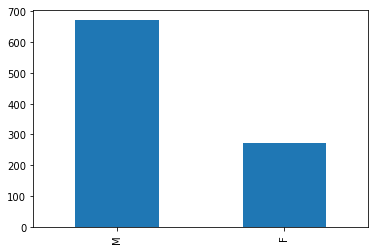

In [12]:
#Lets examine the distribution of gender
users['sex'].value_counts().plot(kind='bar')
users['sex'].value_counts()

#### Our data set is highly imbalanced in relation to gender. There are significantly more males than females.

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
salesman          12
lawyer            12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64

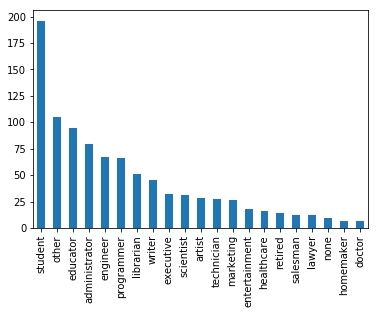

In [13]:
#Lets examine the distribution of occupations
users["occupation"].value_counts().plot(kind='bar')
users['occupation'].value_counts()


#### From above, we see the top listed occupations are student, other, educator, and administrator.

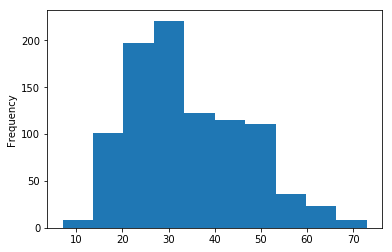

In [14]:
# Lets examine the distribution of the age varaible
users["age"].plot(kind='hist')


#### We find that the data is skewed left with most users being in their late 20s early thirties

In [15]:
#Lets make age bins in case they are useful to us later

bins = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
movie_ratings['age_bins'] = pd.cut(movie_ratings.age, range(0, 81, 10), right=False, labels=bins)
movie_ratings['age_bins'].value_counts()


20-29    39535
30-39    25696
40-49    15021
50-59     8704
10-19     8181
60-69     2623
70-79      197
0-9         43
Name: age_bins, dtype: int64

### Now, lets explore the movies data 

In [16]:
info=movies.loc[:,"movie_id":"video_release_date"]
info.describe(include='all')

,movie_id,title,release_date,video_release_date
count,1682.000000,1682,1681,0.0
unique,NaN,1664,240,NaN
top,NaN,"Substance of Fire, The (1996)",01-Jan-1995,NaN
freq,NaN,2,215,NaN
mean,841.500000,NaN,NaN,NaN
std,485.695893,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,421.250000,NaN,NaN,NaN
50%,841.500000,NaN,NaN,NaN
75%,1261.750000,NaN,NaN,NaN


#### From the output above, we see that there are 1664 unique movie titles, with Ulee's Gold being the most see.

In [17]:
genres=movies.loc[:,"unknown":"Western"]
genres.head()

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


#### Note, some movies fall into multiple categories

In [18]:
#Though there is some overlap, lets see how many movies fall into each genre
genres.sum(axis=0)

unknown          2
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

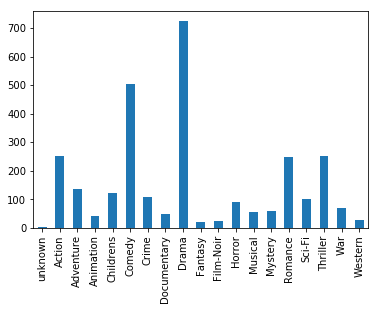

In [19]:
genres.sum(axis=0).plot('bar')

#### From above, we see that drama is the most popular genre with 725 movies falling in to the genre. The second most popular is comedy with 505 movies, and third is action with 251

#### Lets see how many movies fall into more than one category by computing row sums on the genres binary data.

In [20]:

counts=genres.sum(axis=1)
counts.value_counts()

1    833
2    569
3    215
4     51
5     11
6      3
dtype: int64

#### We find that 833 movies are in one genre, 569 movies are in 2 genres, and 215 movies are in 3 genres, etc.

#### Did men and women differ in which genres they watched?

In [21]:
#pull data for males
males= movie_ratings[movie_ratings['sex']=='M']
#pull genre cols
genresM=males.loc[:,"unknown":"Western"]


#pull data for females
females= movie_ratings[movie_ratings['sex']=='F']
#pull genre cols
genresF=females.loc[:,"unknown":"Western"]

Female Genre Distribution


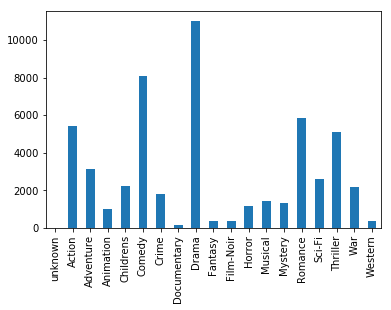

In [22]:
print("Female Genre Distribution")
genresF.sum(axis=0).plot('bar')

Male Genre Distribution


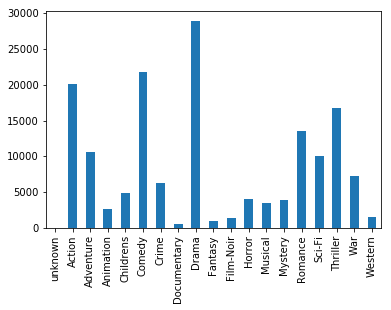

In [23]:
print("Male Genre Distribution")
genresM.sum(axis=0).plot('bar')

In [24]:
print("Female Genre Distribution:")
print(genresF.sum(axis=0))
print("Male Genre Distribution:")
print(genresM.sum(axis=0))


Female Genre Distribution:
unknown            2
Action          5442
Adventure       3141
Animation        995
Childrens       2232
Comedy          8068
Crime           1794
Documentary      187
Drama          11008
Fantasy          363
Film-Noir        385
Horror          1197
Musical         1442
Mystery         1314
Romance         5858
Sci-Fi          2629
Thriller        5086
War             2189
Western          371
dtype: int64
Male Genre Distribution:
unknown            8
Action         20147
Adventure      10612
Animation       2610
Childrens       4950
Comedy         21764
Crime           6261
Documentary      571
Drama          28887
Fantasy          989
Film-Noir       1348
Horror          4120
Musical         3512
Mystery         3931
Romance        13603
Sci-Fi         10101
Thriller       16786
War             7209
Western         1483
dtype: int64


#### We can see that while men have watched more from each genre over all, that is likely due to the unbalanced distribution. The shape of each bar plot for the genre counts is about the same. Frmales do tend to watch more romance movies, and males more thriller and sci-fi, though.

### Now lets look at the distribution of the ratings data


4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64

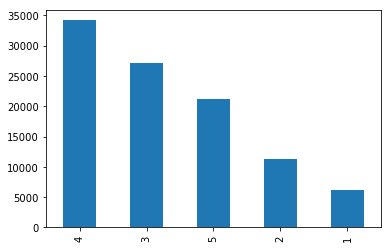

In [25]:
#ratings.head()
ratings['rating'].value_counts().plot('bar')
ratings['rating'].value_counts()


#### We vcan see that most of the movies are rated with 4s and 3s. Few movies were given a rating of 1.

### Further analysis using the merged data

#### What are the highest rated movies?

In [26]:

rankedMovies=movie_ratings.groupby('title').agg({'rating':[np.size,np.mean]})
#rankedMovies.head(10)
rankedMovies.sort_values([('rating','mean')],ascending=False).head(10)

rating     
                                                    size mean
title                                                        
They Made Me a Criminal (1939)                         1  5.0
Marlene Dietrich: Shadow and Light (1996)              1  5.0
Saint of Fort Washington, The (1993)                   2  5.0
Someone Else's America (1995)                          1  5.0
Star Kid (1997)                                        3  5.0
Great Day in Harlem, A (1994)                          1  5.0
Aiqing wansui (1994)                                   1  5.0
Santa with Muscles (1996)                              2  5.0
Prefontaine (1997)                                     3  5.0
Entertaining Angels: The Dorothy Day Story (1996)      1  5.0

#### Note than many of these top movies are only rated one time. Lets look at movies than have been rated 50 times or more

In [27]:
popular_topMovies= rankedMovies['rating']['size']>=50
rankedMovies[popular_topMovies].sort_values([('rating',"mean")],ascending=False).head(10)

rating          
                                                     size      mean
title                                                              
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               298  4.466443
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Wallace & Gromit: The Best of Aardman Animation...     67  4.447761
Shawshank Redemption, The (1994)                      283  4.445230
Rear Window (1954)                                    209  4.387560
Usual Suspects, The (1995)                            267  4.385768
Star Wars (1977)                                      583  4.358491
12 Angry Men (1957)                                   125  4.344000

#### From above, some of the best rated movies are "A Close Shave", "Schindlers List", "Wrong Trousers", and "Casablanca"

#### What  movies have most people seen? What are the most rated movies?

In [28]:

pop_movies = movie_ratings.groupby('title').size().sort_values(ascending=False)[:25]
pop_movies


title
Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Back to the Fu

#### From above, we see that Star Wars, Contact, Fargo, and Return of the Jedi are some of the most seen movies.

#### Now, let's examine how ratings varry accross age, gender, and occupation.

In [29]:
movie_ratings.groupby('age_bins').agg({'rating': [np.size, np.mean]})

rating          
           size      mean
age_bins                 
0-9          43  3.767442
10-19      8181  3.486126
20-29     39535  3.467333
30-39     25696  3.554444
40-49     15021  3.591772
50-59      8704  3.635800
60-69      2623  3.648875
70-79       197  3.649746

In [30]:
movie_ratings.groupby('sex').agg({'rating': [np.size, np.mean]})

rating          
      size      mean
sex                 
F    25740  3.531507
M    74260  3.529289

In [31]:
movie_ratings.groupby('occupation').agg({'rating': [np.size, np.mean]})

rating          
                size      mean
occupation                    
administrator   7479  3.635646
artist          2308  3.653380
doctor           540  3.688889
educator        9442  3.670621
engineer        8175  3.541407
entertainment   2095  3.441050
executive       3403  3.349104
healthcare      2804  2.896220
homemaker        299  3.301003
lawyer          1345  3.735316
librarian       5273  3.560781
marketing       1950  3.485641
none             901  3.779134
other          10663  3.552377
programmer      7801  3.568260
retired         1609  3.466750
salesman         856  3.582944
scientist       2058  3.611273
student        21957  3.515143
technician      3506  3.532230
writer          5536  3.375723

#### From the tables above, we see that there is a positive correlation between age and rating-- younger users have a lower average rating than the older users. We also see there isn't a significant difference between the average ratings for males (3.529) and females (3.531). Finally, we find that healthcare workers have the lowest average rating, at 2.89. Lawyers have the highest average rating, at 3.73. 

#### Let's explore how males and females rate movies differently.

In [32]:
#pivot rating by gender
rateXgender = movie_ratings.pivot_table(index=['movie_id', 'title'],columns=['sex'],values='rating',fill_value=0)
#rateXgender.head()

In [33]:
rateXgender['diff']=rateXgender.M-rateXgender.F
rateXgender.head()

,sex,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102


#### Let's visualize the differences.

In [34]:
rateXgender.reset_index('movie_id', inplace=True)


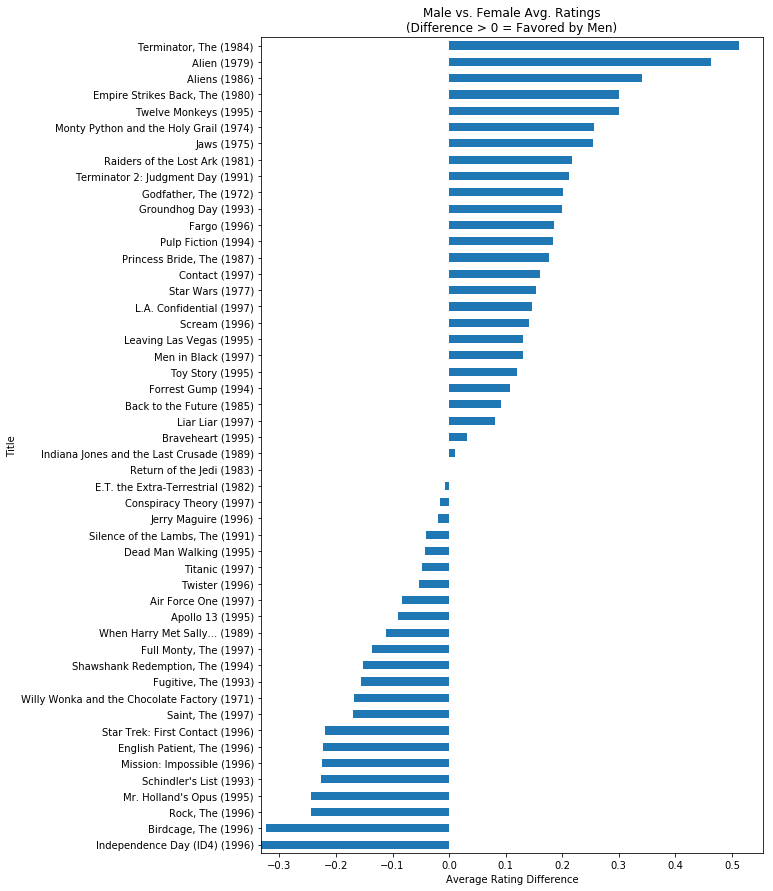

In [35]:
#subset the data-- lets focus on the 50 most rated movies
most_50 = movie_ratings.groupby('movie_id').size().sort_values(ascending=False)[:50]
difference= rateXgender[rateXgender.movie_id.isin(most_50.index)]['diff']

difference.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');



#### From the visual above, we see that the biggest movies that have the biggest differences among geners are "independence Day" (preffered by the women) and "Terminator" (preffered by the men). Males and females felt similarly about "Indiana Jones" and "Return of the Jedi". 

#### Our initial analysis allows us to conclude the gender, age, and occupation all might be significnat predictors of how an individual will rate a movie.  From our last visualization, we see that males and females rate movies differently, so we expect genre to be a significant predictor as well.


### Machine Learning technique 1: Regression

In [36]:
import operator
#from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.cluster import KMeans 
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import scale

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.cross_validation import KFold
from sklearn import cross_validation


/Applications/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
movie_ratings.head()

,movie_id,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,War,Western,user_id,rating,unix_timestamp,age,sex,occupation,zip_code,age_bins
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,308,4,887736532,60,M,retired,95076,60-69
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,308,5,887737890,60,M,retired,95076,60-69
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,308,4,887739608,60,M,retired,95076,60-69
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,308,4,887738847,60,M,retired,95076,60-69
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,308,5,887736696,60,M,retired,95076,60-69


In [38]:
#Separate the target attribute for regression.
y = np.array(movie_ratings.rating)

#create dummy variables for sex and occupation 
df = pd.get_dummies(movie_ratings, columns=['sex','occupation','age_bins'])
df.head()

#Pull the categorical vars from the X that we will need for regression
depVars = np.array(df.drop(['rating', 'release_date','video_release_date','movie_id','user_id',
                                       'IMDb_URL','title','unix_timestamp','zip_code','age'], axis=1))

depVars.shape

#note user and movie id are still in here 

(100000, 50)

In [39]:
X= depVars
print(X.shape,y.shape)

(100000, 50) (100000,)


In [40]:
#create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [41]:
#fit a linear regression model to the data

#X_train_noIDs=np.array(X_train.drop(['movie_id','user_id']))

linreg = LinearRegression()
linreg=linreg.fit(X_train, y_train)






In [42]:
#Use the function from homework 3 to see which function works best

def regressionComparisons(X,y,alpha):
    for method in[LinearRegression(),ElasticNet(fit_intercept=True, alpha=alpha),
                 Lasso(fit_intercept=True, alpha=alpha),Ridge(fit_intercept=True, alpha=alpha)]:
        #compute rmse on training
        method.fit(X,y)
        yHats=method.predict(X)
        error=yHats-y
        total_error=np.dot(error,error)
        rmse_train=np.sqrt(total_error/len(yHats))
        
        #compute rmse on kfold 
        kf=KFold(len(X), n_folds=5)
        err=0
        
        for train, test in kf:
            method.fit(X[train],y[train])
            yHats=method.predict(X[test])
            error=yHats-y[test]
            err+=np.dot(error,error)
            rmse_5cv = np.sqrt(err/len(X))
        print('Method: ', method)
        print('RMSE on training: ', rmse_train)
        print('RMSE on 5-fold CV: ', rmse_5cv)
        print(" ")

In [44]:
regressionComparisons(X,y,0.5)

Method:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
RMSE on training:  1.09772398562
RMSE on 5-fold CV:  19360293400.1
 
Method:  ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
RMSE on training:  1.12566797076
RMSE on 5-fold CV:  1.12626948365
 
Method:  Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
RMSE on training:  1.12566797076
RMSE on 5-fold CV:  1.12626948365
 
Method:  Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
RMSE on training:  1.09771979436
RMSE on 5-fold CV:  1.1103143758
 


In [43]:
regressionComparisons(X,y,0.1)

Method:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
RMSE on training:  1.09772398562
RMSE on 5-fold CV:  19360293400.1
 
Method:  ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
RMSE on training:  1.12340083482
RMSE on 5-fold CV:  1.12401222822
 
Method:  Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
RMSE on training:  1.12566797076
RMSE on 5-fold CV:  1.12626948365
 
Method:  Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
RMSE on training:  1.09771978993
RMSE on 5-fold CV:  1.11032514655
 


In [45]:
#Ridge regression is best
method=Ridge(fit_intercept=True, alpha=0.1)
method.fit(X,y)
yHats=method.predict(X)




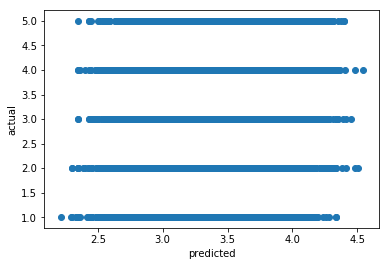

In [46]:
#create a scatter as in the population example
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(yHats,y)


plt.xlabel('predicted')
plt.ylabel('actual')
plt.show() 


#### We find that ridge regression is the best, but still not great. Perahps this is because our values are ordinal ratings rather than continuous predictions.

In [51]:
from sklearn import linear_model

In [60]:
# Lets attempt a logistic regression instead:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train) 

yHats=logistic.predict(X)
error=yHats-y
total_error=np.dot(error,error)
rmse_train=np.sqrt(total_error/len(yHats))
rmse_train

1.1965157750736093

In [57]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y, yHats)
cnf_matrix

array([[  386,     0,  1315,  4286,   123],
       [   74,     0,  2573,  8520,   203],
       [   83,     0,  5306, 21187,   569],
       [   92,     0,  4749, 28367,   966],
       [   60,     0,  2448, 17719,   974]])

In [59]:
yHats

array([4, 4, 4, ..., 4, 3, 4])

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y, yHats)

0.35032999999999997

In [66]:
#again, not a very sucessful method, so we will do a decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

yHats=clf.predict(X)
error=yHats-y
total_error=np.dot(error,error)
rmse_train=np.sqrt(total_error/len(yHats))
rmse_train

1.1640317865075678

In [67]:
accuracy_score(y, yHats)

0.45884000000000003

In [68]:
cnf_matrix2 = confusion_matrix(y, yHats)
cnf_matrix2

array([[ 1929,   322,  1615,  1889,   355],
       [  487,  2587,  3409,  4190,   697],
       [  605,  1228, 12990, 10486,  1836],
       [  578,  1152,  7594, 21839,  3011],
       [  375,   562,  4143,  9582,  6539]])

### Machine Learning technique 2: Clustering

### Machine Learning technique 3: Recommender Systems